<a href="https://colab.research.google.com/github/PedroHudson/PUC_MVP2/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP - Machine Learning & Analytics**

Este projeto visa treinar dois modelos de Machine Learning, um modelo utilizando os métodos clássicos para um problema de classificação (Projeto A), e outro utilizando Deep Learning para um processamento de linguagem natural (Projeto B).

**Projeto A**

**1. Definição do Problema:**

Para a elaboração desse projeto abordaremos um problema de saúde muito comum e de incidência mundial crescente, o Diabetes.

Trata-se de uma síndrome metabólica de origem múltipla, decorrente da incapacidade do pâncreas produzir o hormônio insulina. O papel desse hormônio no nosso organismo é reduzir a glicemia, permitindo que o açucar que está presente no sangue possa penetrar dentro das células, para ser utilizado como fonte de energia. A falta de insulina ocasiona altas taxa de açúcar no sangue (hiperglicemia) de forma permanente podendo gerar probemas renais, oftalmológicos e neuropáticos.

O Diabetes é considerado hoje uma epidemia mundial, sendo o combate a essa enfermidade um grande desafio para os sistemas de saúde de todo o mundo. O envelhecimento da população, a urbanização crescente e a adoção de estilos de vida pouco saudáveis como sedentarismo, dieta inadequada e obesidade são os grandes responsáveis pelo aumento da incidência e prevalência do diabetes em todo o mundo.

Segundo estimativas da Organização Mundial de Saúde, o número de portadores da doença em todo o mundo era de 177 milhões em 2000, com expectativa
de alcançar 350 milhões de pessoas em 2025.

As consequências humanas, sociais e econômicas da doença são devastadoras em nossa sociedade: são em torno de 4 milhões de mortes por ano relativas ao diabetes e suas complicações (com muitas ocorrências prematuras), o que representa 9% da mortalidade mundial total. O grande impacto econômico ocorre notadamente nos serviços de saúde, como consequência dos crescentes custos do tratamento da doença e, sobretudo das complicações, como a doença cardiovascular, a diálise por insuficiência renal crônica e as cirurgias para amputações de membros inferiores.

Os portadores da enfermidade tem expectativa de vida reduzida em média em 15 anos para o diabetes tipo 1 e em 5 a 7 anos na do tipo 2. Os adultos com diabetes têm risco 2 a 4 vezes maior de doença cardiovascular e acidente vascular cerebral. Diabetes é a causa mais comum de amputações de membros inferiores não traumática, cegueira irreversível e doença renal crônica terminal. Em mulheres, é responsável por maior número de partos prematuros e mortalidade materna.

Em um primeiro momento, iremos analisar e identificar quais são os principais fatores para a incidência do Diabates. Posteriormente criaremos modelos de aprendizado de máquina para prever diabetes nos pacientes tomando como base os dados históricos do dataset, possibilitando a identificação de pacientes que podem estar em risco de desenvolver a doença.

Para isso, utilizaremos um dataset disponibilizado no Kaggle contendo uma coleção de dados médicos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue.

Portanto, esse projeto de Machine Learning trata de um problema de classificação.

**É importante informar que o dataset utilizado é diferente do apresentado nas aulas de Machine Learning, segue o link do dataset**: https://www.kaggle.com/datasets/717451f4573e9c3d8963e626808ade67a89fbd2ee660be008c1aba16b2a2345a.


**2. Importação das Bibliotecas e Configurações.**

In [1]:
# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Seaborn
import seaborn as sns

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importações dos modelos e configurações para treinamento do modelo, criação de pipelines, ensembles e para a apuração do resultado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importações para Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Transformações Númericas

# Normalização
from sklearn.preprocessing import MinMaxScaler

# Padronização
from sklearn.preprocessing import StandardScaler

**3. Importação do Dataset.**

In [2]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://github.com/PedroHudson/diabetes/blob/main/diabetes.csv?raw=true'

# carga do dataset através da url
dataset = pd.read_csv(url_dados, sep=',')

**4. Análise Exploratória - Primeiras Visualizações e Análises.**

In [3]:
# Visualização da quantidade de instâncias e atributos do dataset
dataset.shape

(100000, 9)

*Nessa primeira análise verificamos que o dataset tem 9 atributos e 1000 instâncias.*

In [4]:
# Visualização da quantidade de linhas por coluna
dataset.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

*Todas os atributos possuem a mesma quantidade de instâncias.*

In [5]:
# Visualização dos tipos de dados
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

*A visualização dos tipos de dados nos permite verificar que os atributos "gender" e "smoking_history" são do tipo object.*

In [6]:
# Visualização das primeiras linhas do dataframe
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# Visualização das últimas linhas do dataframe
dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [8]:
# Visualiação da distribuição dos dados da coluna Diabetes
dataset_distrib = dataset['diabetes'].value_counts()/len(dataset)
dataset_distrib

0    0.915
1    0.085
Name: diabetes, dtype: float64

*Verificamos que o dataset está desbalanceado, tendo a grande maioria das instâncias o status não diabetes.*

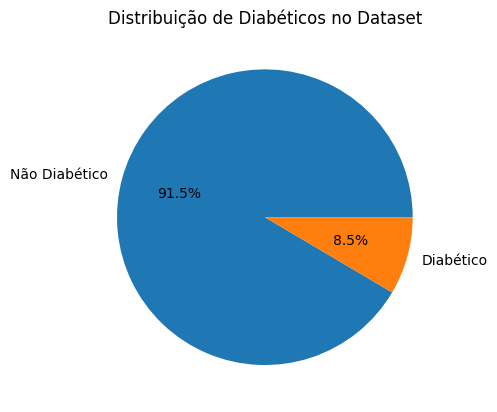

In [9]:
# Plotando gráfico de pizza para a visualização da distribuição
plt.pie(dataset_distrib, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

**5. Pré-processamento: (a) Balanceamento do Dataset; (b) Visualizações dos Dados Balanceados; (c) Primeira Seleção dos Atributos, Criação do novo Dataset; (d) Divisão do Dataset em Conjuntos de Treino e Teste; (e) Análise dos Atributos com SelectKBest; (f) Criação do Dataset Final.**

**(a) Balanceamento do Dataset.**

In [10]:
# Balanceamento do dataset
neg_diab = dataset[dataset['diabetes']==0].sample(8500)
pos_diab = dataset[dataset['diabetes']==1]
dataset_balanceado = pd.concat([neg_diab,pos_diab],axis=0)

*Visando obter um melhor resultado e evitar o overfitting, realizamos um balanceamento do dataset.*

**(b) Visualizações dos Dados Balanceados.**

In [11]:
# Visualização da distribuição dos dados da coluna Diabetes após o balanceamento
dataset_dist = dataset_balanceado['diabetes'].value_counts()/len(dataset)
dataset_dist

0    0.085
1    0.085
Name: diabetes, dtype: float64

*Com o tratamento realizado o dataset agora possui a mesma quantidade de instâncias para os dois resultados da coluna.*

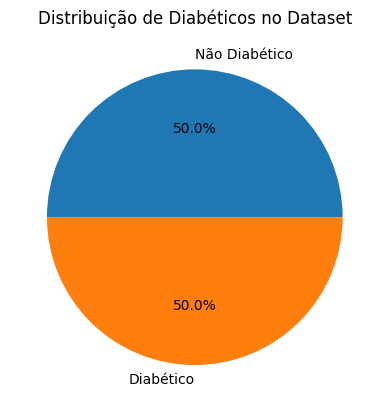

In [12]:
# Plotando gráfico de pizza para a visualização da nova distribuição
plt.pie(dataset_dist, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

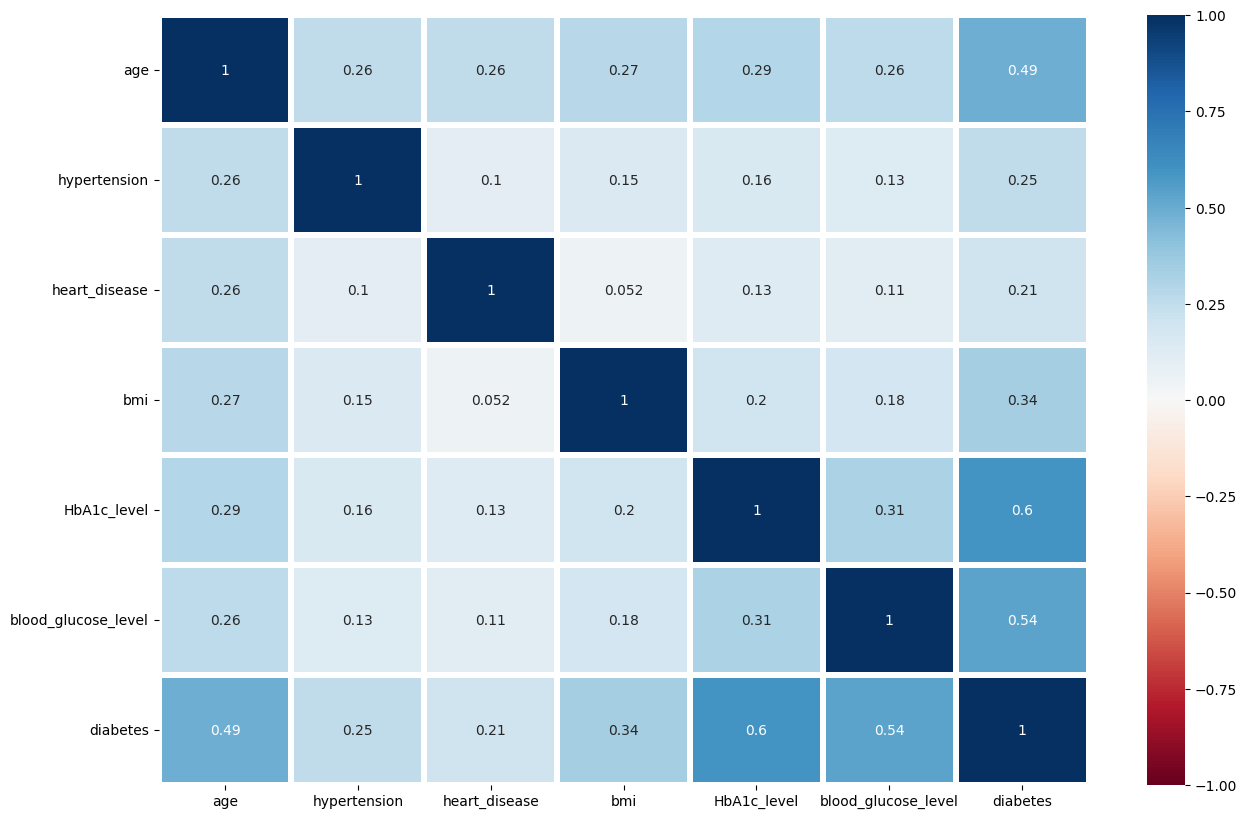

In [13]:
# Grafico de correlação com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(dataset_balanceado.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');

*Através do Gráfico de Correlação podemos visualizar quais atributos tem uma correlação maior com a coluna Diabetes.*

**(c) Primeira Seleção dos Atributos, Criação do novo Dataset.**

In [14]:
# Seleção dos atributos para a criação do novo dataframe
dataset_novo = dataset_balanceado[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

*Diante das informações obtidas através do Gráfico de Correlação, foi criado um novo dataset.*

**(d) Divisão do Dataset em Conjuntos de Treino e Teste.**

In [15]:
# Separação em bases de treino e teste (holdout)
array = dataset_novo.values
X = array[:,0:6]
y = array[:,6]

**(e) Análise dos Atributos com SelectKBest.**

In [16]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset_novo.columns[0:6])

# Exibe as pontuações de cada atributo e os 4 escolhidos (com pontuação mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_novo.columns[0:6]))


Número original de atributos: 6

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

Scores dos Atributos Originais: [5421.647 1177.354  791.42  2258.403 9614.225 6823.821]

Atributos Selecionados: ['age' 'bmi' 'HbA1c_level' 'blood_glucose_level']


*A seleção de atributos através do SelectKBest tem como objetivo a redução do overfitting (minimizando o ruído), a melhoria dos resultados, a redução do tempo de treinamento e a melhoria da interpretabilidade do modelo.*

**(f) Criação do Dataset Final.**

In [17]:
# Seleção das colunas para a criação do dataframe final.
dataset_final = dataset_novo[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

**6. Modelagem e Inferência: (a) Separação do Conjunto de Treino e Teste; (b) Criação e Avaliação dos Modelos.**

**(a) Separação do Conjunto de Treino e Teste.**

In [18]:
# Separação em conjunto de treino e teste com holdout

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# separação em conjunto de treino e teste
array = dataset_final.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

*Foram utilizadas as técnicas Holdout e Validação Cruzada para obtermos os melhores resultados.*

**(b) Criação e Avaliação dos Modelos.**

LR: 0.882059 (0.011548)
KNN: 0.864118 (0.010387)
CART: 0.877721 (0.009394)
NB: 0.868015 (0.014026)
SVM: 0.868603 (0.014662)
Bagging: 0.898676 (0.011504)
RF: 0.899118 (0.010935)
ET: 0.895588 (0.009160)
Ada: 0.910735 (0.008645)
GB: 0.913162 (0.010100)
Voting: 0.897647 (0.012338)


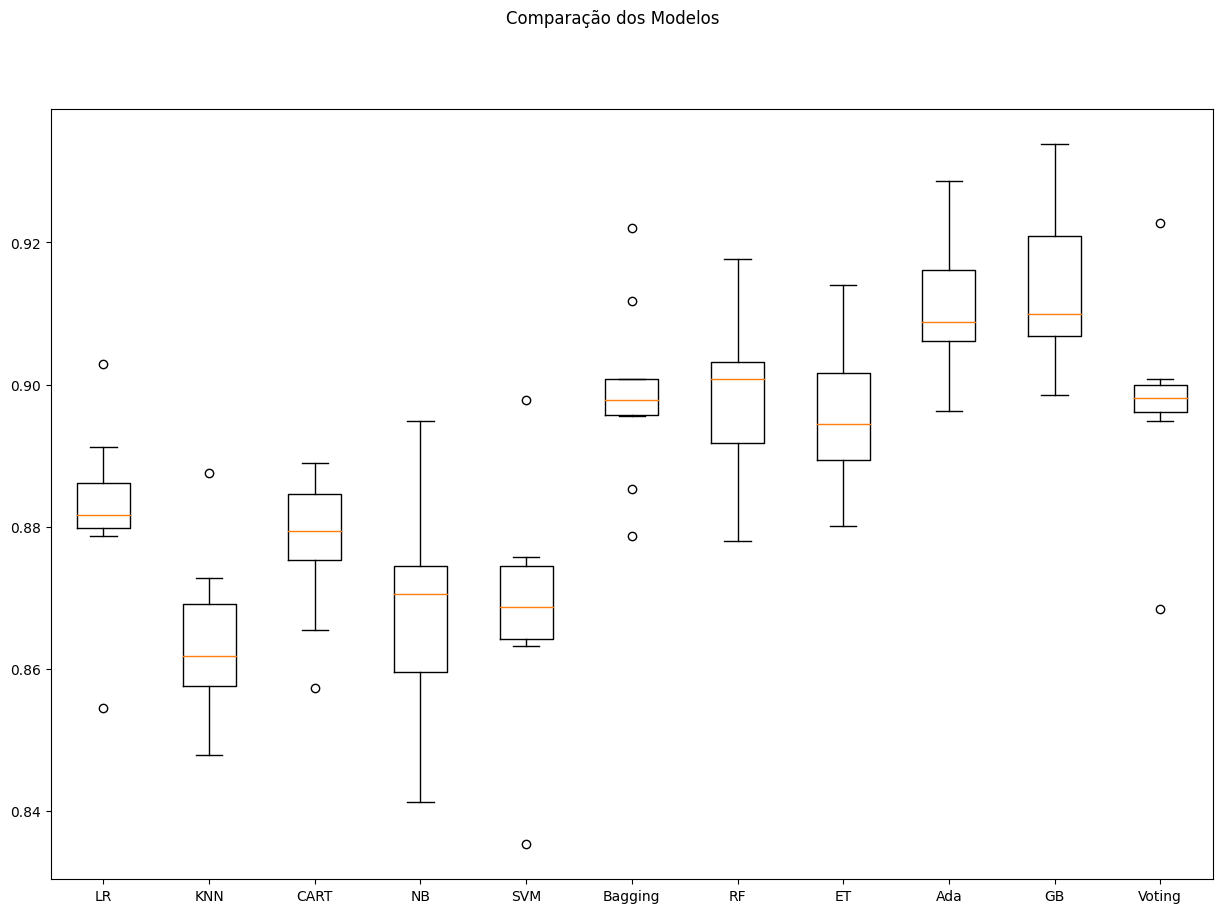

In [19]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

*(A) Para a criação dos modelos foram utilizados os seguintes algoritmos clássicos preditivos de classificação: Regressão Logística, KNN, Árvore de Classificação, Naive Bayes e SVM.
Foram criados também ensembles visando a obtenção de melhores resultados.*

*(B) Os resultados de acurácia dos modelos foram bons, demonstrando que o tratamento realizado através do feature selection ajudou na performance dos modelos. Outro aspecto a ser apontado é que o resultado positivo pode ter sido influenciado também devido a quantidade pequena e a correlação positiva dos atributos.
O melhor resultado ocorreu através do algortimo Gradient Boosting Classifier.*

LR-orig: 0.882 (0.012)
KNN-orig: 0.864 (0.010)
CART-orig: 0.878 (0.009)
NB-orig: 0.868 (0.014)
SVM-orig: 0.869 (0.015)
Bag-orig: 0.899 (0.012)
RF-orig: 0.899 (0.011)
ET-orig: 0.896 (0.009)
Ada-orig: 0.911 (0.009)
GB-orig: 0.913 (0.010)
Vot-orig: 0.898 (0.012)
LR-padr: 0.882 (0.012)
KNN-padr: 0.890 (0.014)
CART-padr: 0.878 (0.009)
NB-padr: 0.868 (0.014)
SVM-padr: 0.901 (0.012)
Bag-padr: 0.898 (0.011)
RF-padr: 0.900 (0.012)
ET-padr: 0.896 (0.009)
Ada-padr: 0.911 (0.009)
GB-padr: 0.913 (0.010)
Vot-padr: 0.898 (0.011)
LR-norm: 0.882 (0.012)
KNN-norm: 0.889 (0.012)
CART-norm: 0.878 (0.008)
NB-norm: 0.868 (0.014)
SVM-norm: 0.900 (0.012)
Bag-norm: 0.897 (0.013)
RF-norm: 0.899 (0.011)
ET-norm: 0.896 (0.010)
Ada-norm: 0.911 (0.009)
GB-norm: 0.913 (0.010)
Vot-norm: 0.898 (0.011)


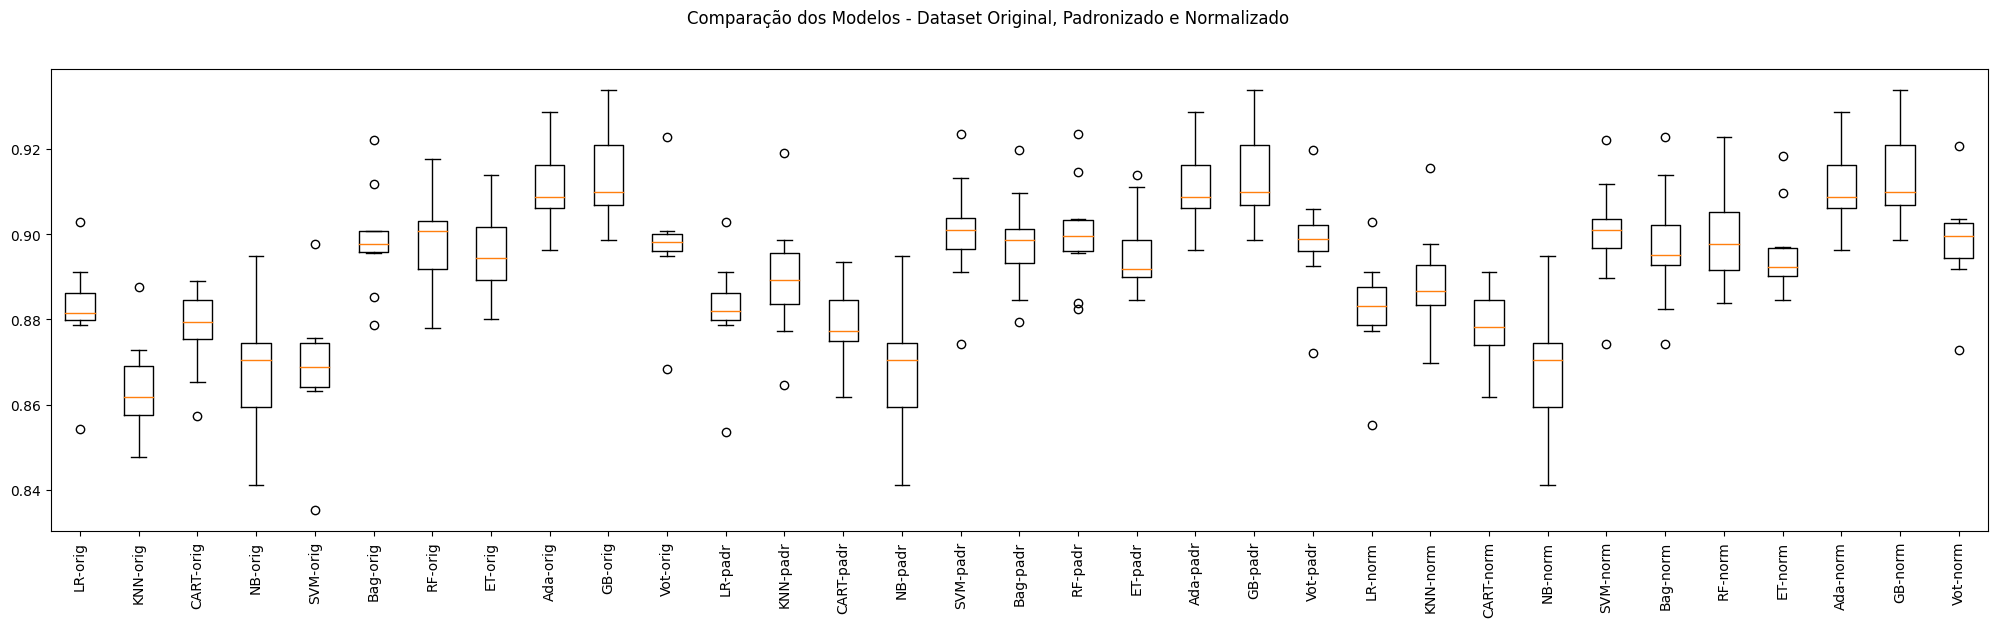

In [20]:
# Criação e avaliação de modelos: dados padronizados e normalizados

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset Original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

#Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset Original, Padronizado e Normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

*(A) Nessa nova etapa do projeto os algoritmos foram testados novamente dessa vez comparando com os dados originais com os tratados através da normalização e padronização. Foram utilizados também pipelines com o objetivo de evitar a ocorrência de data leakage.*

*(B) O algoritmo Gradient Boosting Classifier permaneceu com a melhor acurácia.*

**7. Otimização de Hiperparâmetros.**

*Diante do excelente resultado obtido através do algortimo Gradient Boosting Classifier, não vemos como necessária a otimização dos hiperparâmetros do modelo. Apenas para demonstração, foi realizado o Tuning através do algoritmo KNN.*

In [ ]:
# Otimização de Hiperparâmetros

# Tuning do KNN (não rodar)

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV

for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid.fit(X_train, y_train)
  # imprime a melhor configuração
  print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.867868 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.897059 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-norm - Melhor: 0.896985 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


*A otimização dos hiperparâmetros gerou uma melhor acurácia no modelo KNN, tendo o melhor resultado através do modelo padronizado.*

**8. Pós-processamento: (a) Predição no Conjunto de Teste (Validação Final); (b) Salvamento do Modelo para uso posterior.**

**(a) Predição no Conjunto de Teste (Validação Final).**



In [21]:
# Finalização do Modelo

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(random_state=10)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9094117647058824


*O modelo Gradient Boosting Classifier foi avaliado com os dados de teste e obteve uma acurácia muito próxima da avaliação realizada nos dados de treinamento.*

**(b) Salvamento do Modelo para uso posterior.**

In [22]:
# Preparação do modelo com todo o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com todo o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com todo o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier(random_state=10)

**9. Referências bibliográficas.**

Diabetes Mellitus - Biblioteca Virtual em Saúde. https://bvsms.saude.gov.br. Disponível em: https://bvsms.saude.gov.br/bvs/publicacoes/diabetes_mellitus.PDF. Acesso em 15 de julho de 2023.

Diabetes Mellitus. https://www.saude.pr.gov.br. Disponível em: https://www.saude.pr.gov.br/Pagina/Diabetes-diabetes-mellitus#:~:text=A%20glicemia%20alta%20reduz%20a,c%C3%A9lulas%2C%20principalmente%20as%20dos%20neur%C3%B4nios.&text=Pessoas%20com%20diabetes%20podem%20apresentar,e%2Fou%20circula%C3%A7%C3%A3o%20sangu%C3%ADnea%20deficiente. Acesso em 15 de julho de 2023.

Diabetes: O que é, Tipos, Sintomas, Como cuidar e mais. https://www.hermespardini.com.br. Disponível em: https://www.hermespardini.com.br/blog/?p=111#:~:text=O%20diabetes%20%C3%A9%20uma%20doen%C3%A7a,altera%C3%A7%C3%A3o%20na%20taxa%20de%20glicemia. Acesso em 15 de julho de 2023.

**Projeto B**

**1. Definição do Problema:**

Nesse segundo projeto iremos treinar um modelo de Machine Learning utilizando Deep Learning para o processamento de linguagem natural (PLN).

Para isso, utilizaremos um dataset do Kaggle que trata das emoções geradas através de textos. O dataset contém 2 colunas, uma com textos e outra com a classificação da emoção (happy, sadness, anger, fear, love e surprise).

**2. Importação das Bibliotecas e Configurações.**

In [23]:
# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importação do MissingNo para tratamento de missings
import missingno as ms

# Importações dos modelos, framework e configurações para treinamento do modelo e apuração do resultado
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau

**3. Importação do Dataset.**

In [24]:
# Importando dados da url para um dataframe

# url a importar

url_dados = 'https://github.com/PedroHudson/Deep_Learning/blob/main/emotion.csv?raw=true'

# carga do dataset através da url
dataset = pd.read_csv(url_dados, sep=';', encoding = 'ISO-8859-1')
dataset[['Text', 'Emotion']] = dataset['Text,Emotion'].str.split(',', 1, expand=True)
dataset = dataset[['Text', 'Emotion']]

**4. Análise Exploratória - Primeiras Visualizações e Análises.**

In [25]:
# Visualização da quantidade de instâncias e atributos do dataset
dataset.shape

(21459, 2)

*Conforme informado anteriormente, o dataset tem 2 colunas.*

In [26]:
# Visualização das primeiras linhas do dataframe
dataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [27]:
# Visualização das últimas linhas do dataframe
dataset.tail()

,Text,Emotion
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear
21458,I am dismayed,"but not surpris,fear"


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21444 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [29]:
# Visualização dos tipos de dados
dataset.dtypes

Text       object
Emotion    object
dtype: object

In [30]:
# Visualização da quantidade de linhas por coluna
dataset.count()

Text       21459
Emotion    21444
dtype: int64

In [31]:
# Verificação de nulls do dataset
dataset.isnull().sum()

Text        0
Emotion    15
dtype: int64

*Através das duas últimas visualizações verificamos que a coluna Emotion tem linhas com null.*

**5. Pré-processamento. (a) Tratamento de Missings; (b) Transformação Categórica; (c) Separação dos dados entre treino e teste; (d) Tokenização - limpeza e transformação dos dados em informações estruturadas.**

**(a) Tratamento de Missings.**

In [32]:
# Dataset antes do tratamento
dataset_antes = dataset.shape
print("Antes do tratamento:\t", dataset_antes)

dataset.dropna(subset=['Emotion'], inplace=True)

# Dataset depois do tratamento
dataset_depois = dataset.shape
print("Depois do tratamento:\t", dataset_depois)

Antes do tratamento:	 (21459, 2)
Depois do tratamento:	 (21444, 2)


*Foi efetuado um tratamento para a eliminação dos nulls através do metódo dropna. Com isso o dataset passou a ter a mesma quantidade de linhas para ambas colunas.*

In [33]:
# Verificação dos nulls após o tratamento
dataset.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [34]:
# Visualização da quantidade de linhas por coluna após o tratamento
dataset.count()

Text       21444
Emotion    21444
dtype: int64

*As duas últimas visualizações confirmam que o tratamento foi eficaz.*

**(b) Transformação Categórica.**

In [35]:
# One Hot Encoding
category = pd.get_dummies(dataset.Emotion)
dataset1 = pd.concat([dataset, category], axis=1)
dataset1 = dataset1.drop(columns='Emotion')

*Transformando dados categóricos em dados numéricos.*

**(c) Separação dos dados entre treino e teste.**

In [36]:
X = dataset1['Text'].values
y = dataset1[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**(d) Tokenização - limpeza e transformação dos dados em informações estruturadas.**

In [38]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<x>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Seq_train = tokenizer.texts_to_sequences(X_train)
Seq_test = tokenizer.texts_to_sequences(X_test)

Pad_train = pad_sequences(Seq_train)
Pad_test = pad_sequences(Seq_test)

**6. Modelagem e Inferência.**

In [39]:
model = Sequential([
    Embedding(input_dim = 5000, output_dim = 24),
    BatchNormalization(),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    LSTM(128),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(6, activation='softmax')
])

*Criação do modelo e camadas com as funções de ativação relu e softmax.*

In [40]:
class callbackTarget(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.91 and logs.get('accuracy') >= 0.91):
      print('\nVal_accuracy and accuracy has reached >= 91%!')
      self.model.stop_training = True

callbacks = callbackTarget()

LR_reduction = ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

In [41]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**7. Treinamento do Modelo.**

In [42]:
history = model.fit(
    Pad_train, y_train,
    epochs = 100,
    batch_size = 128,
    validation_data = (Pad_test, y_test),
    verbose = 1,
    callbacks = [callbacks, LR_reduction]
)

Epoch 1/100
135/135 [==============================] - 77s 500ms/step - loss: 1.8764 - accuracy: 0.2311 - val_loss: 1.5488 - val_accuracy: 0.3574 - lr: 0.0010
Epoch 2/100
135/135 [==============================] - 68s 506ms/step - loss: 1.5905 - accuracy: 0.3337 - val_loss: 1.5255 - val_accuracy: 0.2882 - lr: 0.0010
Epoch 3/100
135/135 [==============================] - 71s 529ms/step - loss: 1.4146 - accuracy: 0.4480 - val_loss: 2.0801 - val_accuracy: 0.3350 - lr: 0.0010
Epoch 4/100
135/135 [==============================] - 67s 496ms/step - loss: 1.1506 - accuracy: 0.5609 - val_loss: 1.8950 - val_accuracy: 0.4045 - lr: 0.0010
Epoch 5/100
135/135 [==============================] - 68s 501ms/step - loss: 0.9307 - accuracy: 0.6339 - val_loss: 0.9584 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 6/100
135/135 [==============================] - 67s 496ms/step - loss: 0.7396 - accuracy: 0.6849 - val_loss: 0.7542 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 7/100
135/135 [=========================

**8. Avaliação.**

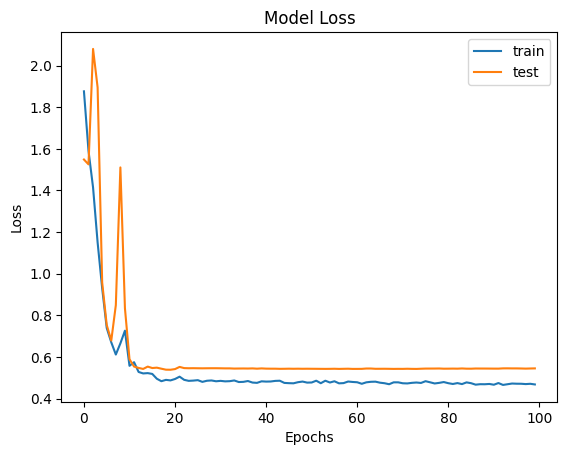

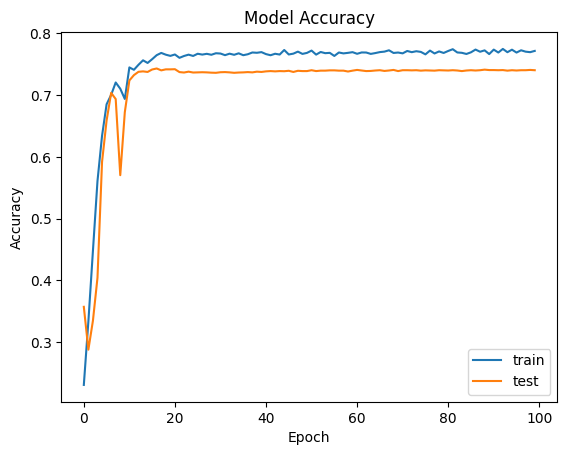

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

*Atráves dos gráficos podemos verificar que o modelo teve desempenho similar nos dados de treinamento e teste, obtendo uma acurácia razoável.*